Integration of m_LCA1-2, h_LCA1-5, lymphoid

In [2]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd

# Read  and combine filtered datasets

In [3]:
results_file = 'write_LCA/integrated_LCA.h5ad'  # the file that will store the analysis results

Read each filtered data.Use the logtransformed normalized counts.

In [4]:
adata_m=sc.read_h5ad("write_LCA/m_LCA1-2_lymphoid.h5ad")
adata_h=sc.read_h5ad("write_LCA/h_LCA1-5_lymphoid.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [5]:
adata_m=adata_m.raw.to_adata()
adata_h=adata_h.raw.to_adata()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Add sample_type to obs.key

In [6]:
#adata_ort_CRC.obs['sample_type']='orthotopic'
adata_m.obs['species']='mouse'
adata_h.obs['species']='human'

### Convert mouse gene names to human gene names:

In [7]:
hom_dict = np.load('write_LCA/hom_dict_v2.npy',allow_pickle=True).item() # load the 1:1 homolog dictionary

#### convert mouse genes

In [8]:
mouse_symbols = list(adata_m.var_names)

In [9]:
mouse_convert_symbols = [] # human homologs
n_miss = 0 # number of genes not found in the dictionary
for mouse_symbol in mouse_symbols:
    try:
        mouse_convert_symbols.append(hom_dict[mouse_symbol])
    except KeyError:
        mouse_convert_symbols.append('miss-'+str(n_miss))
        n_miss +=1
        print(mouse_symbol+' not found') # print genes not found in the homolog conversion dictionary

0610007P14Rik not found
0610009B22Rik not found
0610009L18Rik not found
0610009O20Rik not found
0610010F05Rik not found
0610011F06Rik not found
0610037L13Rik not found
1110001J03Rik not found
1110004E09Rik not found
1110007C09Rik not found
1110008F13Rik not found
1110008L16Rik not found
1110008P14Rik not found
1110012L19Rik not found
1110025L11Rik not found
1110034G24Rik not found
1110037F02Rik not found
1110057P08Rik not found
1190002N15Rik not found
1190003K10Rik not found
1190005I06Rik not found
1200014J11Rik not found
1300017J02Rik not found
1500009C09Rik not found
1500011B03Rik not found
1500011K16Rik not found
1500012F01Rik not found
1500015O10Rik not found
1520401A03Rik not found
1600002H07Rik not found
1600002K03Rik not found
1600014C23Rik not found
1600014K23Rik not found
1600015I10Rik not found
1600029O15Rik not found
1700001C02Rik not found
1700001C19Rik not found
1700001F09Rik not found
1700001J03Rik not found
1700001J11Rik not found
1700001K19Rik not found
1700003H04Rik no

In [10]:
print('mouse genes without 1:1 homologous human genes in adata_m: '+str(n_miss))
print('mouse genes in adata_m: '+str(len(mouse_symbols)))
print('mouse genes converted successfully to human homologs in adata_m: '+str(len(mouse_symbols)-n_miss))

mouse genes without 1:1 homologous human genes in adata_m: 12589
mouse genes in adata_m: 28205
mouse genes converted successfully to human homologs in adata_m: 15616


In [11]:
adata_m.var_names = mouse_convert_symbols

In [12]:
adata_m.var_names

Index(['miss-0', 'miss-1', 'miss-2', 'miss-3', 'miss-4', 'C17orf49', 'miss-5',
       'C2orf68', 'miss-6', 'C4orf19',
       ...
       'miss-12588', 'COX3', 'CYTB', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5',
       'ND6'],
      dtype='object', length=28205)

### Combine different datasets

In [13]:
# HVG detection
sc.pp.highly_variable_genes(adata_m, n_top_genes = 2000) 
sc.pp.highly_variable_genes(adata_m) 
adata_m = adata_m[:, adata_m.var.highly_variable]

In [14]:
sc.pp.highly_variable_genes(adata_h, n_top_genes = 2000) 
sc.pp.highly_variable_genes(adata_h) 
adata_h = adata_h[:, adata_h.var.highly_variable]

In [15]:
adatas=[adata_m,adata_h]
adatas = ad.concat(adatas, merge = "same")
adata_m=adatas[adatas.obs['species']=='mouse',:]
adata_h=adatas[adatas.obs['species']=='human',:]

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [16]:
adata_m

View of AnnData object with n_obs × n_vars = 3966 × 2114
    obs: 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_singleR', 'Major cell type', 'Minor subset', 'Library', 'leiden', 'lymphoid', 'label_rough', 'species'
    var: 'mt', 'highly_variable'
    obsm: 'X_pca', 'X_umap'

In [17]:
adata_h

View of AnnData object with n_obs × n_vars = 18937 × 2114
    obs: 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_singleR', 'Major cell type', 'Minor subset', 'Library', 'leiden', 'lymphoid', 'label_rough', 'species'
    var: 'mt', 'highly_variable'
    obsm: 'X_pca', 'X_umap'

In [16]:
adata_m_T=adata_m[adata_m.obs['label_rough']=='m-T',:]
adata_h_T=adata_h[adata_h.obs['label_rough']=='h-T/NK',:]

In [ ]:
#adatas = sc.read_h5ad(results_file)

Logarithmize the data:

In [15]:
#sc.pp.log1p(adatas)

In [30]:
#adatas

# Identify highly-variable genes.

In [17]:
#sc.pp.highly_variable_genes(adatas, n_top_genes = 2000) 
#sc.pp.highly_variable_genes(adatas) 

In [18]:
#sc.pl.highly_variable_genes(adatas)

In [19]:
#adatas.raw = adatas

In [20]:
#adatas = adatas[:, adatas.var.highly_variable]

In [14]:
sc.pp.regress_out(adatas, ['total_counts','pct_counts_mt'])

In [15]:
sc.pp.scale(adatas, max_value=10)

In [16]:
adatas

AnnData object with n_obs × n_vars = 23005 × 15385
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'label_singleR', 'leiden', 'Major cell type', 'Minor subset', 'Library', 'lymphoid', 'species'
    var: 'mt', 'mean', 'std'
    obsm: 'X_pca', 'X_umap'

# mnn batch effect correction

In [17]:
del(adatas, adata_m, adata_h)

In [18]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
adatas=sce.pp.mnn_correct(adata_m_T[range(0,100)],adata_h_T[range(0,100)],batch_key='species')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/mnnpy/utils.py:30: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 1d, A))
  dist[i, j] = np.dot(m[i], n[j])
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/mnnpy/utils.py:205: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, C), array(float32, 1d, A))
  scale = np.dot(working, grad)
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/mnnpy/utils.py:215: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, C), array(float32, 1d, A))
  curproj = np.dot(grad, curcell)


In [17]:
adatas

(([View of AnnData object with n_obs × n_vars = 3966 × 15385
       obs: 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_singleR', 'Major cell type', 'Minor subset', 'Library', 'leiden', 'lymphoid', 'label_rough', 'species'
       var: 'mt'
       obsm: 'X_pca', 'X_umap',
   View of AnnData object with n_obs × n_vars = 18937 × 15385
       obs: 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_singleR', 'Major cell type', 'Minor subset', 'Library', 'leiden', 'lymphoid', 'label_rough', 'species'
       var: 'mt'
       obsm: 'X_pca', 'X_umap'],),
 [],
 [])

# Principal component analysis

In [17]:
sc.tl.pca(adatas, svd_solver='arpack')

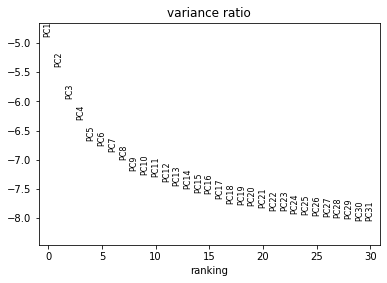

In [18]:
sc.pl.pca_variance_ratio(adatas, log=True)

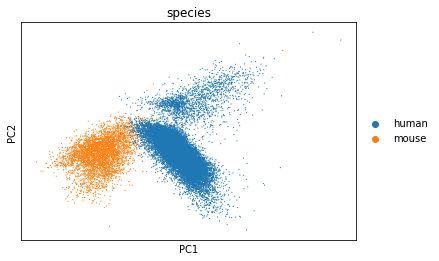

In [19]:
sc.pl.pca(adatas, color = 'species')

# Before integration

In [20]:
sc.pp.neighbors(adatas, key_added='raw',n_pcs=17)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
adatas

AnnData object with n_obs × n_vars = 23005 × 15385
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'label_singleR', 'leiden', 'Major cell type', 'Minor subset', 'Library', 'lymphoid', 'species'
    var: 'mt', 'mean', 'std'
    uns: 'pca', 'species_colors', 'raw'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'raw_distances', 'raw_connectivities'

In [22]:
sc.tl.umap(adatas, neighbors_key='raw')

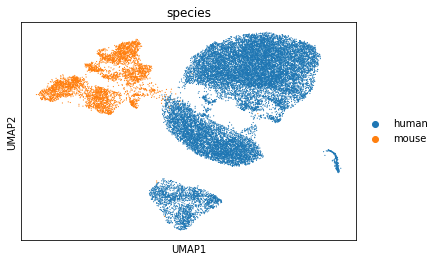

In [23]:
sc.pl.umap(adatas, color='species')

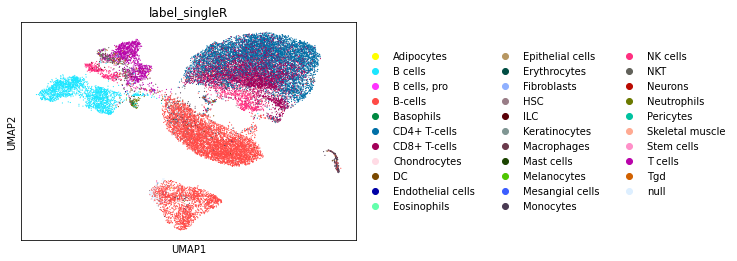

In [24]:
sc.pl.umap(adatas, color='label_singleR')

# Integration
integrate datasets with harmony

batch corrected pca obtained and X_pca_harmony added to the obsm

In [25]:
sce.pp.harmony_integrate(adatas, 'species') 

2022-04-10 19:47:18,582 - harmonypy - INFO - Iteration 1 of 10
2022-04-10 19:47:29,839 - harmonypy - INFO - Iteration 2 of 10
2022-04-10 19:47:41,067 - harmonypy - INFO - Iteration 3 of 10
2022-04-10 19:47:52,374 - harmonypy - INFO - Iteration 4 of 10
2022-04-10 19:48:03,730 - harmonypy - INFO - Iteration 5 of 10
2022-04-10 19:48:14,987 - harmonypy - INFO - Iteration 6 of 10
2022-04-10 19:48:25,656 - harmonypy - INFO - Iteration 7 of 10
2022-04-10 19:48:34,796 - harmonypy - INFO - Iteration 8 of 10
2022-04-10 19:48:44,440 - harmonypy - INFO - Iteration 9 of 10
2022-04-10 19:48:51,997 - harmonypy - INFO - Iteration 10 of 10
2022-04-10 19:48:59,499 - harmonypy - INFO - Stopped before convergence


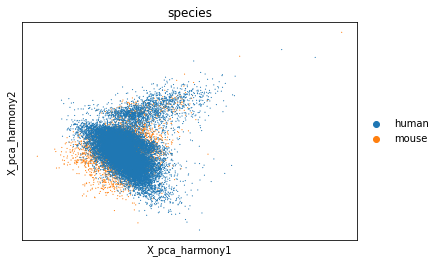

In [26]:
sc.pl.embedding( adatas, basis='X_pca_harmony', color=['species'])

In [27]:
adatas.write(results_file)

# Computing the neighborhood graph

In [28]:
sc.pp.neighbors(adatas, use_rep='X_pca_harmony', n_pcs=17)

# Embedding the neighborhood graph

In [29]:
sc.tl.umap(adatas)

In [25]:
adatas

AnnData object with n_obs × n_vars = 23005 × 15385
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'label_singleR', 'leiden', 'Major cell type', 'Minor subset', 'Library', 'lymphoid', 'species'
    var: 'mt', 'mean', 'std'
    uns: 'pca', 'species_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

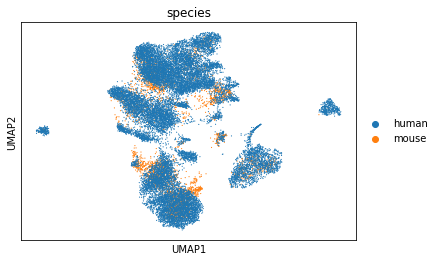

In [30]:
sc.pl.umap(adatas, color='species')

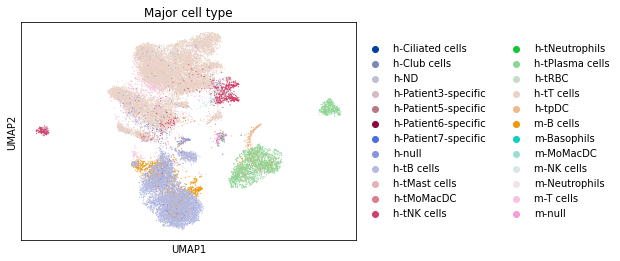

In [58]:
sc.pl.umap(adatas, color='Major cell type')

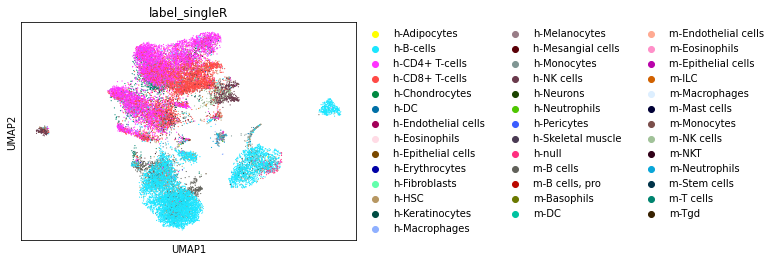

In [61]:
sc.pl.umap(adatas, color='label_singleR')

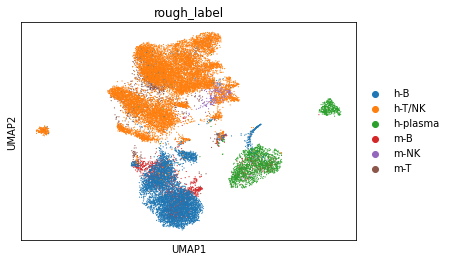

In [23]:
sc.pl.umap(adatas, color='rough_label')

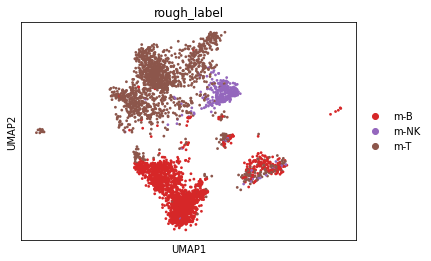

In [7]:
sc.pl.umap(adatas[adatas.obs['species']=='mouse',:], color='rough_label')

# Clustering the neighborhood graph

In [32]:
sc.tl.leiden(adatas, resolution = 1.5)

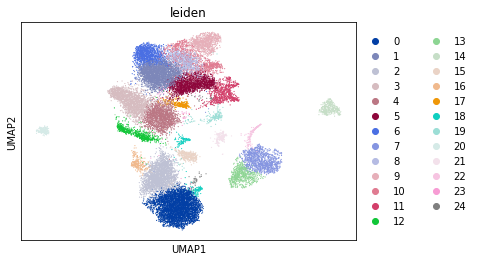

In [33]:
#sc.pl.umap(adatas, color=['louvain'], legend_loc='on data')
sc.pl.umap(adatas, color=['leiden'])

In [24]:
adatas.write(results_file)

In [4]:
adatas = sc.read_h5ad(results_file)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py3/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


# unify the label names

In [40]:
adatas

AnnData object with n_obs × n_vars = 23005 × 15385
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'label_singleR', 'leiden', 'Major cell type', 'Minor subset', 'Library', 'species'
    var: 'mt', 'mean', 'std'
    uns: 'pca', 'species_colors', 'raw', 'umap', 'label_singleR_colors', 'neighbors', 'Major cell type_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'raw_distances', 'raw_connectivities', 'distances', 'connectivities'

In [46]:
##assign the species name to each cell type key-Major cell type
'''
maj_list=[]
for i in range(0,len(adatas.obs['species'])):
    if adatas.obs['species'][i]=='mouse':
        maj_list.append('m-'+adatas.obs['Major cell type'][i])
    elif adatas.obs['species'][i]=='human':
        maj_list.append('h-'+adatas.obs['Major cell type'][i])
adatas.obs['Major cell type'] = maj_list
'''

In [59]:
##assign the species name to each cell type key-singleR
singleR_list=[]
for i in range(0,len(adatas.obs['species'])):
    if adatas.obs['species'][i]=='mouse':
        singleR_list.append('m-'+adatas.obs['label_singleR'][i])
    elif adatas.obs['species'][i]=='human':
        singleR_list.append('h-'+adatas.obs['label_singleR'][i])
adatas.obs['label_singleR'] = singleR_list

In [60]:
adatas.obs['label_singleR']

m_LCA1-t_1_1-bc0020             m-Tgd
m_LCA1-t_1_1-bc0028         m-T cells
m_LCA1-t_1_1-bc0031         m-T cells
m_LCA1-t_1_1-bc0066         m-T cells
m_LCA1-t_1_1-bc0068             m-NKT
                            ...      
bcFXSC                 h-CD4+ T-cells
bcEJEP                      h-B-cells
bcHFBA                      h-B-cells
bcHAJY                     h-NK cells
bcCXBJ                     h-NK cells
Name: label_singleR, Length: 23005, dtype: object

# Color cells from 1 cluster at a time:


plot on subsets:

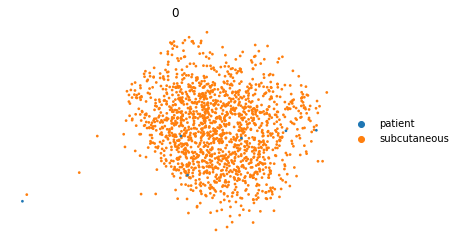

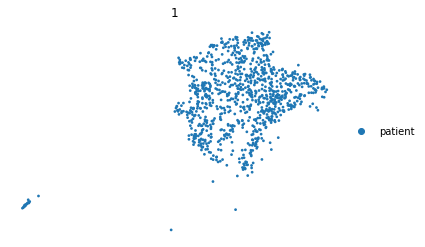

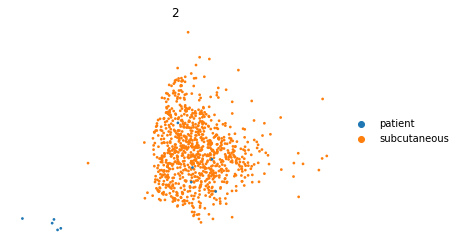

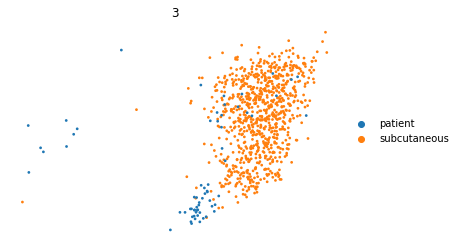

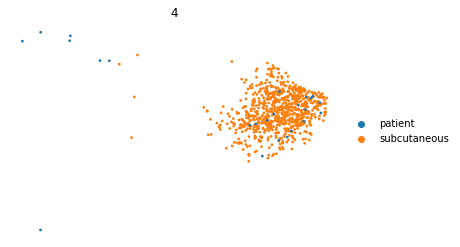

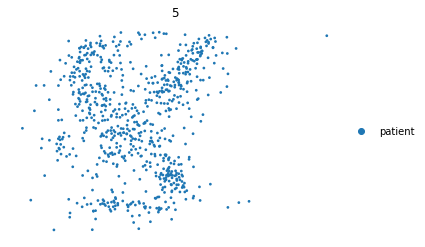

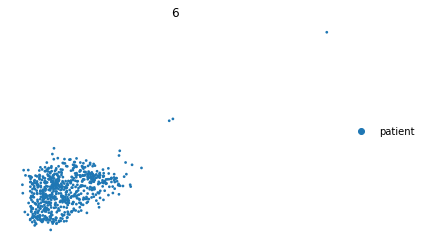

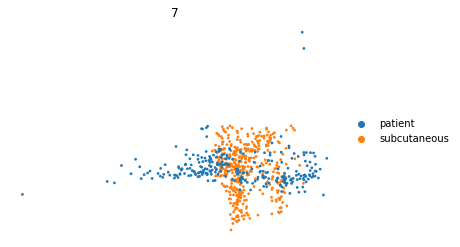

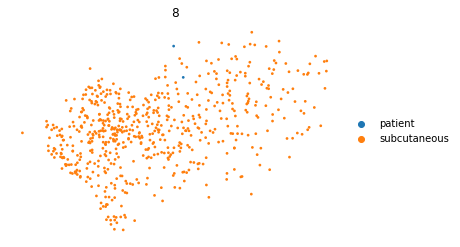

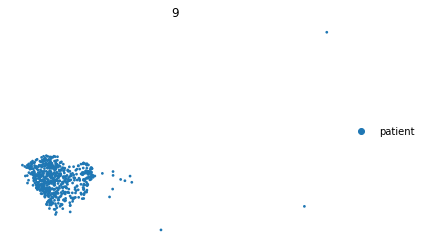

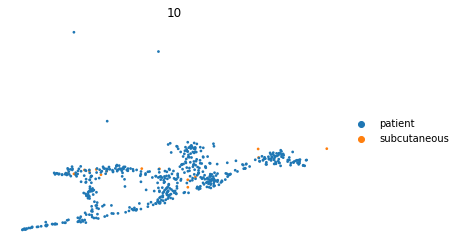

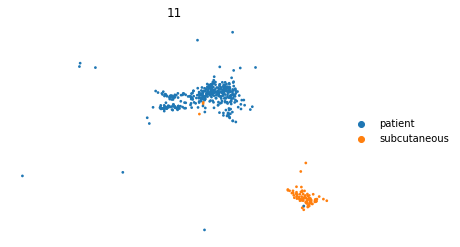

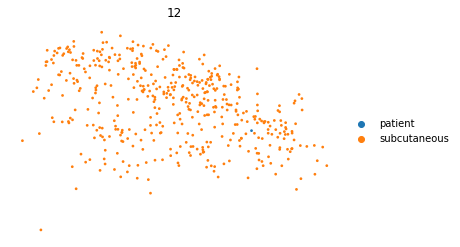

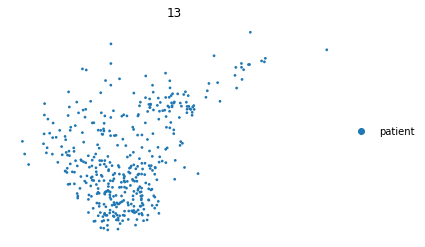

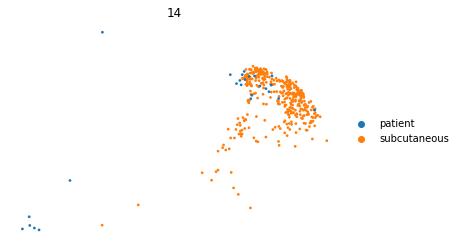

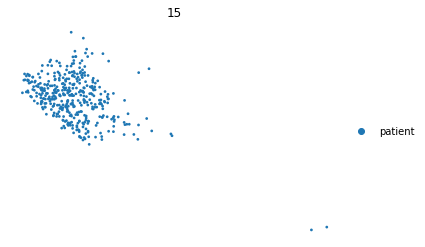

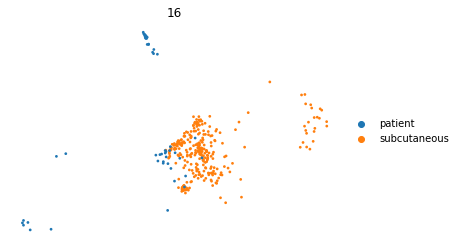

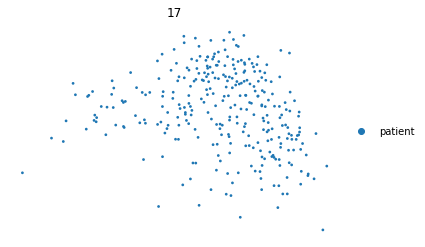

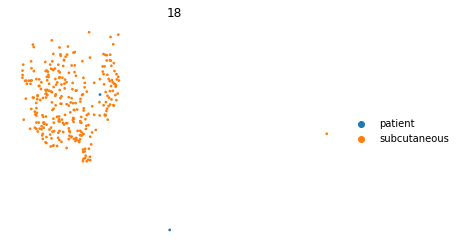

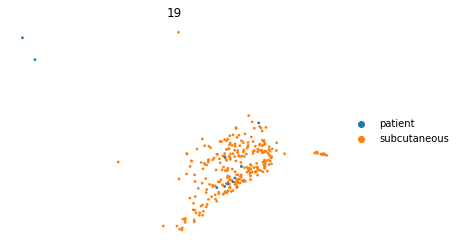

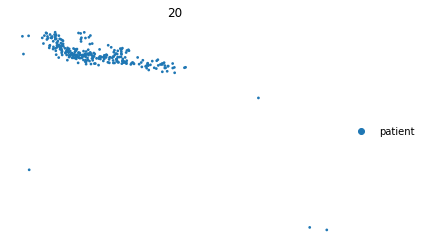

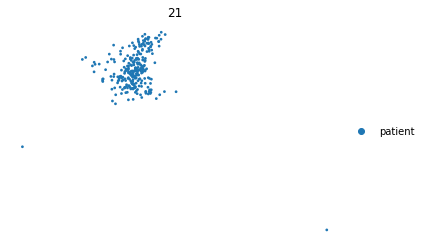

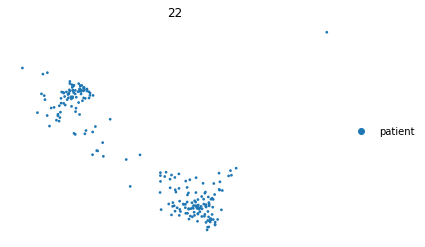

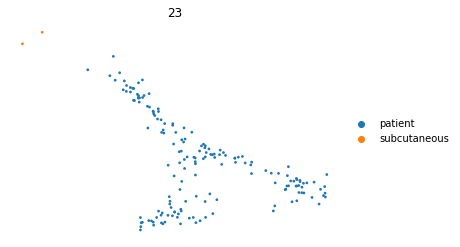

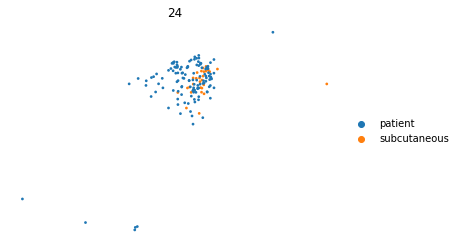

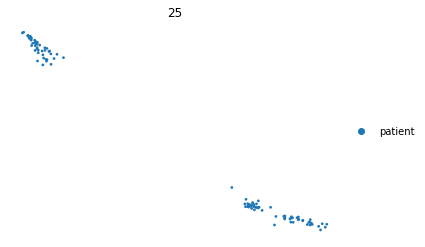

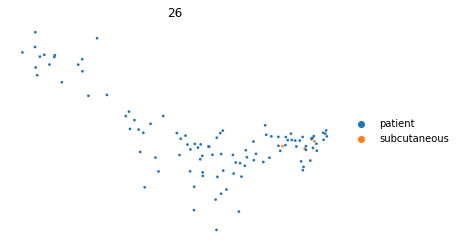

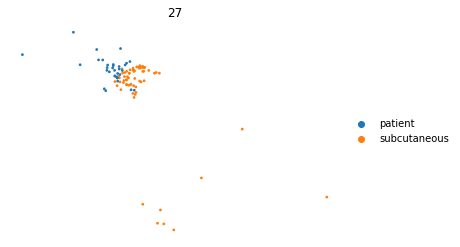

In [57]:

for i,clust in enumerate(adatas.obs['louvain'].cat.categories):
    adata_subset = adatas[adatas.obs['louvain'].isin([str(i)])]
    sc.pl.umap(adata_subset, color='sample_type',size =30, title = clust, frameon = False)

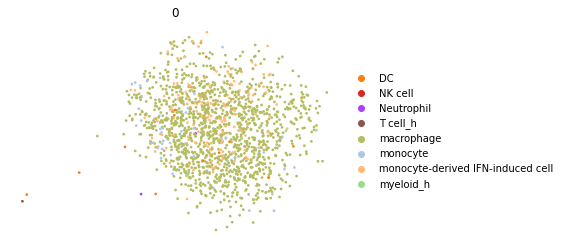

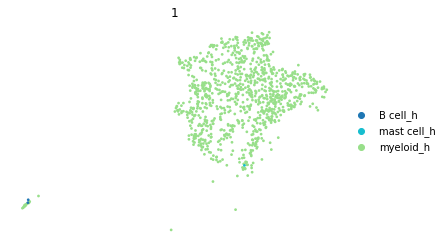

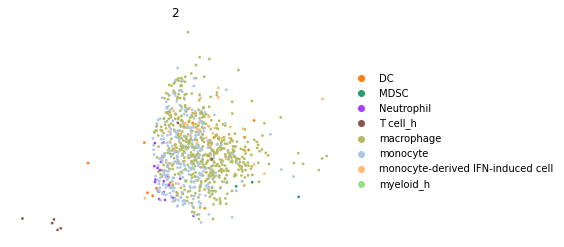

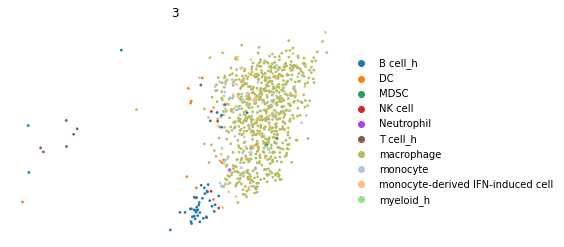

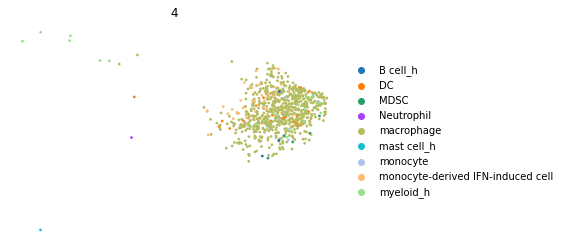

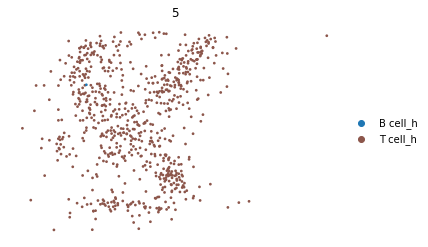

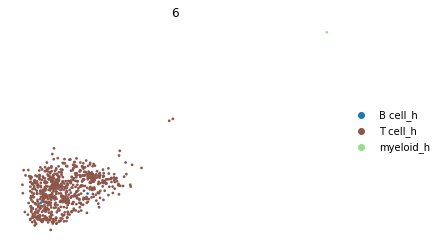

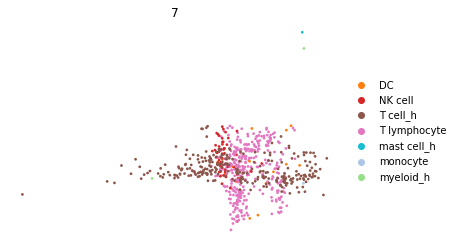

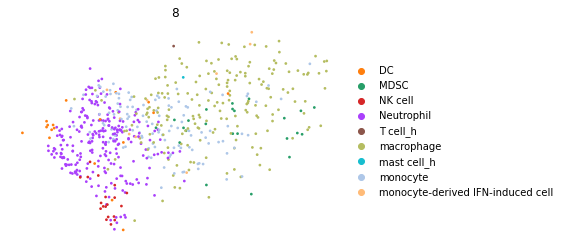

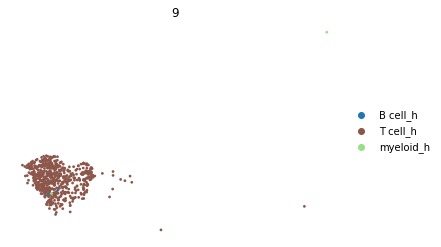

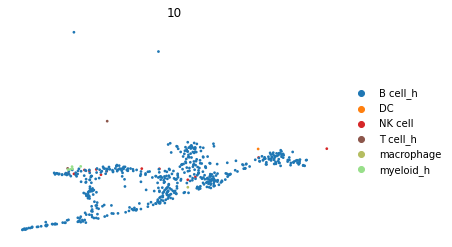

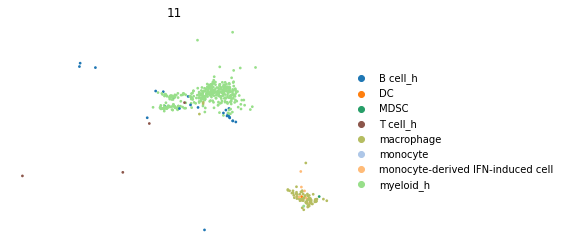

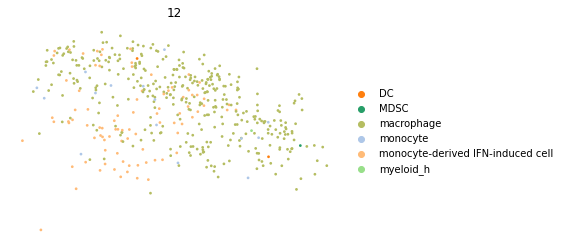

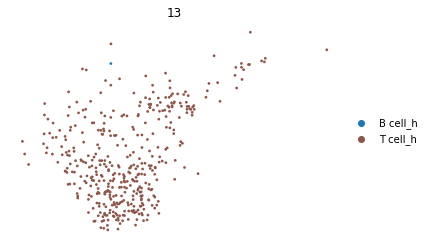

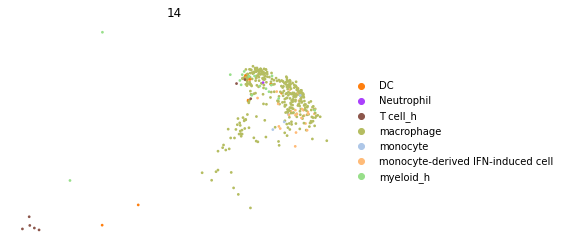

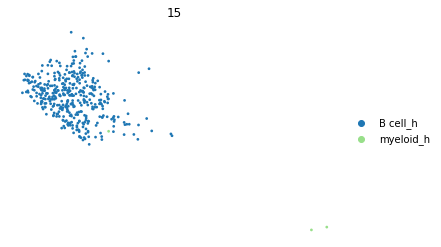

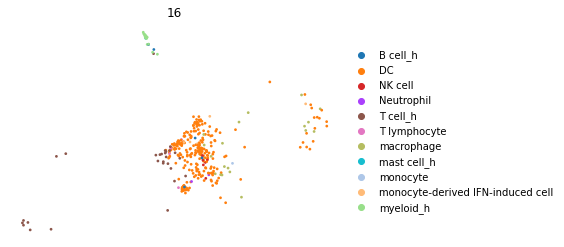

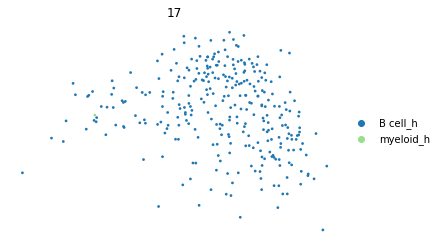

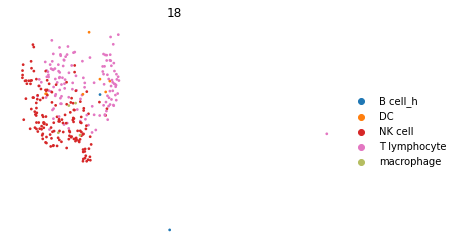

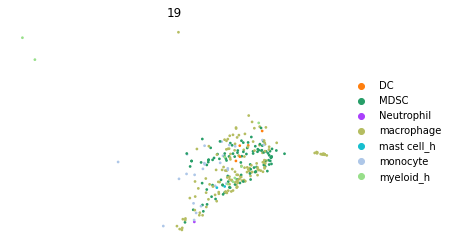

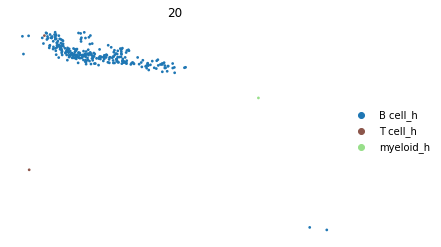

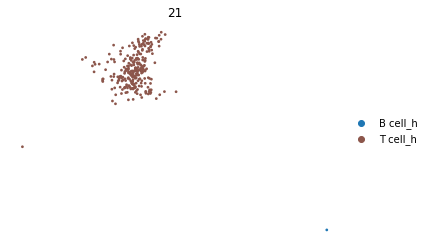

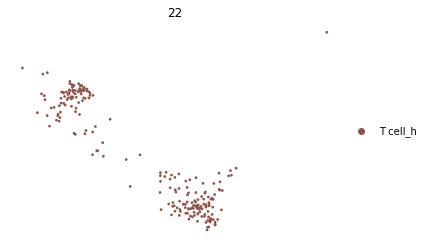

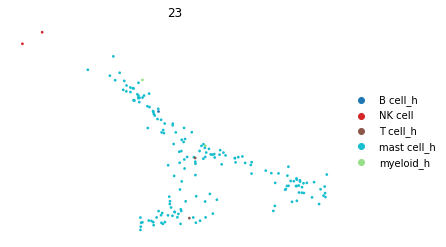

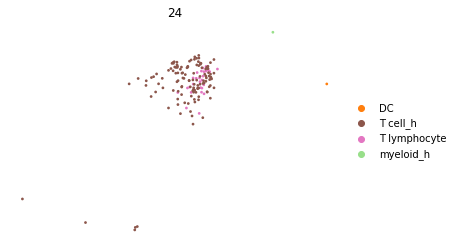

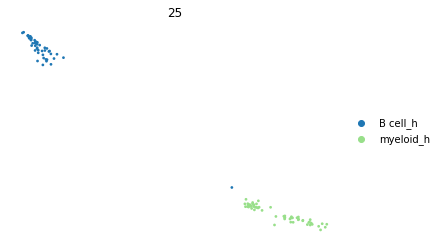

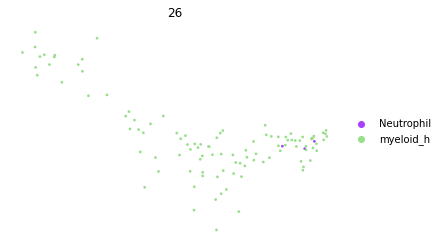

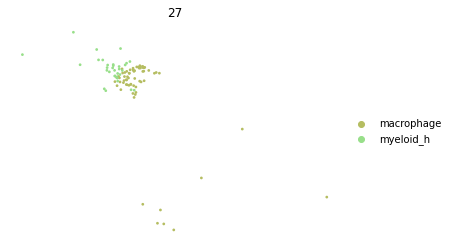

In [58]:
for i,clust in enumerate(adatas.obs['louvain'].cat.categories):
    adata_subset = adatas[adatas.obs['louvain'].isin([str(i)])]
    sc.pl.umap(adata_subset, color='cell_type',size =30, title = clust, frameon = False)

In [48]:
#import matplotlib.pyplot as plt